<a href="https://colab.research.google.com/github/Vijayarengan27/Neural-Network-from-scratch/blob/main/Simple_neural_network_with_Batch_and_momentum_based_Gradient_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
def initialize_parameters():
  np.random.seed(999)
  W1 = np.random.randn(10,784) * (1/np.sqrt(784))
  b1 = np.random.randn(10,1) * (1/np.sqrt(10))
  W2 = np.random.randn(10,10) * (1/np.sqrt(10))
  b2 = np.random.randn(10,1) * (1/np.sqrt(10))
  return W1, b1, W2, b2

def ReLu(Z):
  return np.maximum(Z,0)

def SoftMax(Z):
  a = Z - Z.max(axis = 0)
  return np.exp(a)/np.sum(np.exp(a),axis = 0)

def Onehot(y):
  one_hot_y = np.zeros((y.max()+1,y.shape[0]))
  one_hot_y[y,np.arange(y.shape[0])] = 1
  return one_hot_y

def deriv_ReLu(Z):
  return Z > 0

In [40]:
def forward_propogation(X,W1,b1,W2,b2):  # need to have X without transposed
  A0 = X.T
  Z1 = W1.dot(A0) + b1
  A1 = ReLu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = SoftMax(Z2)
  return Z1, A1, Z2, A2

def back_propogation(Z1, A1, Z2, A2, W2, X, y):
  m = y.shape[0]
  one_hot_y = Onehot(y)

  dZ2 = A2 - one_hot_y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2,axis = 1,keepdims = True)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
  dW1 = 1/m * dZ1.dot(X)
  db1 = 1/m * np.sum(dZ1,axis = 1,keepdims = True)

  return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [50]:
def get_prediction(A2):
  return np.argmax(A2,0)  # doubt

def get_accuracy(predictions,y):
  return np.sum(predictions == y)/y.shape[0]

def plot_accuracy(accuracies,valid_accuracies):
  plt.plot(accuracies,label = 'Training accuracy',color = 'red')
  plt.plot(valid_accuracies,label = 'Validation accuracy',color = 'blue')
  plt.xlabel('Number of Iterations (in tens)')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def show_prediction(X,y,W1,b1,W2,b2):
  A2 = forward_propogation(X, W1, b1, W2, b2)[3]
  y_pred = get_prediction(A2)
  print(f'The actual label: {y}')
  print(f'The predicted label: {y_pred}')
  plt.imshow(X.reshape(28,28),cmap = 'gray')
  plt.show()

def gradient_boost(X, y, X_test, y_test, iterations, alpha):
  accuracies = []
  valid_accuracies = []
  W1, b1, W2, b2 = initialize_parameters()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propogation(X,W1,b1,W2,b2)
    dW1, db1, dW2, db2 = back_propogation(Z1, A1, Z2, A2, W2, X, y)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i+1)%10 == 0:
      predictions = get_prediction(A2)
      print(f'The number of iterations: {i+1} The training accuracy: {get_accuracy(predictions,y)}')
      accuracies.append(get_accuracy(predictions,y))
      valid_predictions = get_prediction(forward_propogation(X_test, W1, b1, W2, b2)[3])
      valid_accuracies.append(get_accuracy(valid_predictions,y_test))
  plot_accuracy(accuracies,valid_accuracies)
  return W1, b1, W2, b2


In [42]:
train = pd.read_csv('/content/train.csv')
train.shape

(42000, 785)

In [43]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train = np.array(train)

In [45]:
np.random.shuffle(train)

X_train = train[0:38000,1:]
y_train = train[0:38000,0]
X_test = train[38000:,1:]
y_test = train[38000:,0]

In [46]:
X_train = X_train/255  # grayscaling the pixels
X_test = X_test/255  # grayscaling the pixels

The number of iterations: 10 The training accuracy: 0.3445
The number of iterations: 20 The training accuracy: 0.38973684210526316
The number of iterations: 30 The training accuracy: 0.5029473684210526
The number of iterations: 40 The training accuracy: 0.6022631578947368
The number of iterations: 50 The training accuracy: 0.7083947368421053
The number of iterations: 60 The training accuracy: 0.783
The number of iterations: 70 The training accuracy: 0.8215
The number of iterations: 80 The training accuracy: 0.8337631578947369
The number of iterations: 90 The training accuracy: 0.8430526315789474
The number of iterations: 100 The training accuracy: 0.8509473684210527
The number of iterations: 110 The training accuracy: 0.858421052631579
The number of iterations: 120 The training accuracy: 0.8633684210526316
The number of iterations: 130 The training accuracy: 0.8681578947368421
The number of iterations: 140 The training accuracy: 0.8720789473684211
The number of iterations: 150 The trai

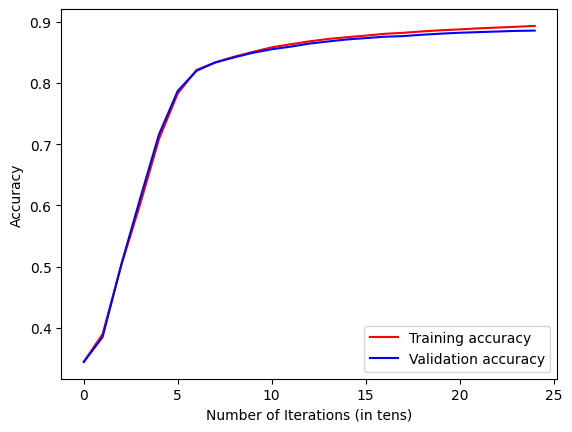

In [57]:
W1, b1, W2, b2 = gradient_boost(X_train,y_train,X_test,y_test,250,0.1)

The actual label: 7
The predicted label: [7]


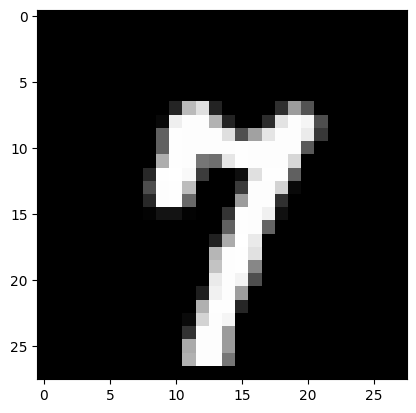

The actual label: 9
The predicted label: [8]


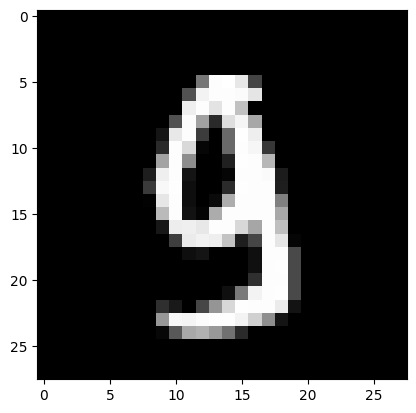

The actual label: 4
The predicted label: [4]


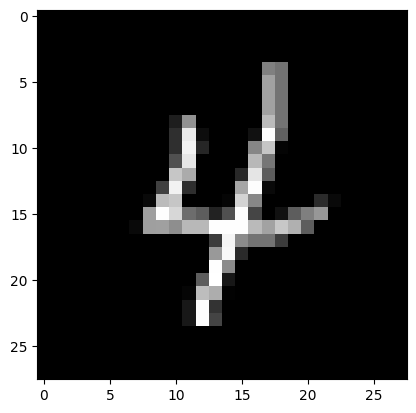

The actual label: 1
The predicted label: [1]


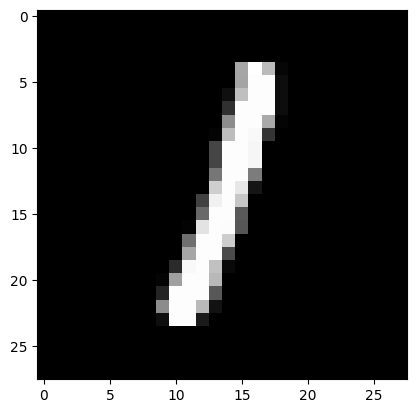

In [60]:
show_prediction(X_test[0,np.newaxis],y_test[0], W1, b1, W2, b2)
show_prediction(X_test[55,np.newaxis],y_test[55], W1, b1, W2, b2)
show_prediction(X_test[99,np.newaxis],y_test[99], W1, b1, W2, b2)
show_prediction(X_test[273,np.newaxis],y_test[273], W1, b1, W2, b2)


In [51]:
def update_momentum_parameters(W1, b1, W2, b2, vW1, vb1, vW2, vb2, alpha):

  W1 = W1 - alpha * vW1
  b1 = b1 - alpha * vb1
  W2 = W2 - alpha * vW2
  b2 = b2 - alpha * vb2
  return W1, b1, W2, b2

def momentum_based_gradient_boost(X, y, X_test, y_test, iterations, alpha, beta):
  accuracies = []
  valid_accuracies = []
  W1, b1, W2, b2 = initialize_parameters()
  vW1 = np.zeros(W1.shape)
  vb1 = np.zeros(b1.shape)
  vW2 = np.zeros(W2.shape)
  vb2 = np.zeros(b2.shape)


  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propogation(X, W1, b1, W2, b2)
    dW1, db1, dW2, db2 = back_propogation(Z1, A1, Z2, A2, W2, X, y)
    vW1 = beta * vW1 + (1 - beta) * dW1
    vb1 = beta * vb1 + (1 - beta) * db1
    vW2 = beta * vW2 + (1 - beta) * dW2
    vb2 = beta * vb2 + (1 - beta) * db2
    W1, b1, W2, b2 = update_momentum_parameters(W1, b1, W2, b2, vW1, vb1, vW2, vb2, alpha)
    if (i+1)%10 == 0:
      predictions = get_prediction(A2)
      print(f'The number of iterations: {i+1} The training accuracy: {get_accuracy(predictions,y)}')
      accuracies.append(get_accuracy(predictions,y))
      valid_predictions = get_prediction(forward_propogation(X_test, W1, b1, W2, b2)[3])
      valid_accuracies.append(get_accuracy(valid_predictions,y_test))
  plot_accuracy(accuracies,valid_accuracies)
  return W1, b1, W2, b2


The number of iterations: 10 The training accuracy: 0.21789473684210525
The number of iterations: 20 The training accuracy: 0.32776315789473687
The number of iterations: 30 The training accuracy: 0.3780263157894737
The number of iterations: 40 The training accuracy: 0.454
The number of iterations: 50 The training accuracy: 0.5477631578947368
The number of iterations: 60 The training accuracy: 0.6441578947368422
The number of iterations: 70 The training accuracy: 0.7265789473684211
The number of iterations: 80 The training accuracy: 0.7783684210526316
The number of iterations: 90 The training accuracy: 0.8096315789473684
The number of iterations: 100 The training accuracy: 0.8201578947368421
The number of iterations: 110 The training accuracy: 0.8295526315789473
The number of iterations: 120 The training accuracy: 0.8378684210526316
The number of iterations: 130 The training accuracy: 0.846421052631579
The number of iterations: 140 The training accuracy: 0.8522894736842105
The number of

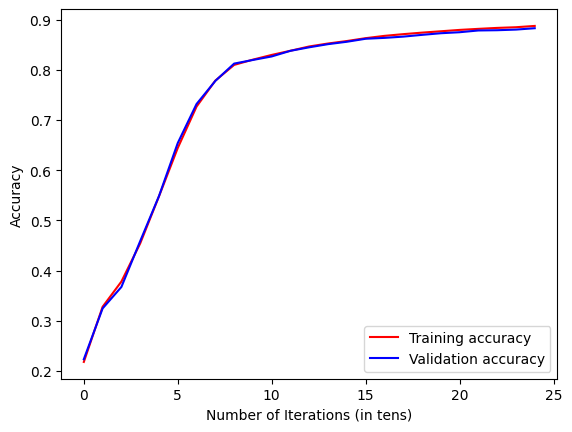

In [58]:
mW1, mb1, mW2, mb2 = momentum_based_gradient_boost(X_train, y_train, X_test, y_test, 250, 0.1, 0.9)

The actual label: 7
The predicted label: [7]


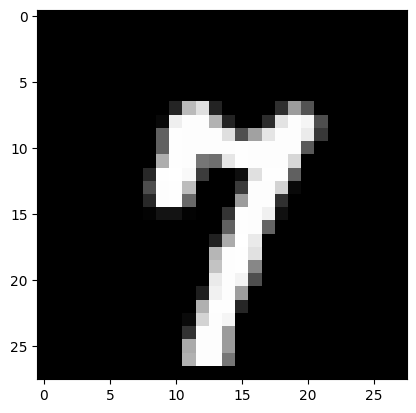

The actual label: 9
The predicted label: [8]


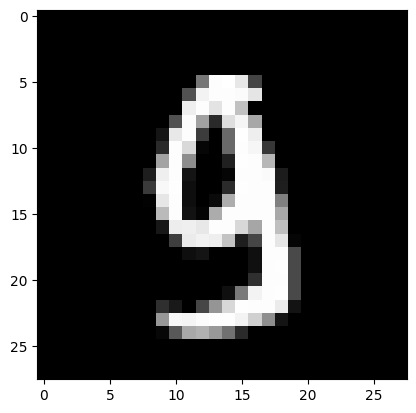

The actual label: 4
The predicted label: [4]


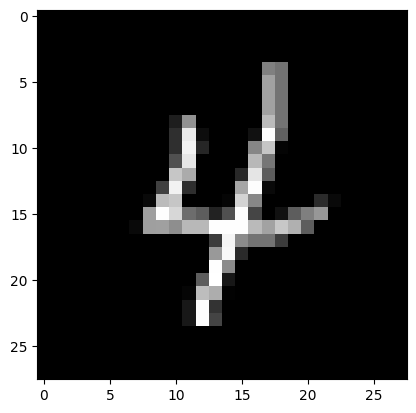

The actual label: 1
The predicted label: [1]


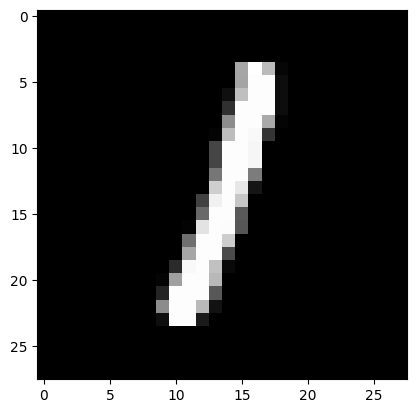

In [59]:
show_prediction(X_test[0,np.newaxis],y_test[0], mW1, mb1, mW2, mb2)
show_prediction(X_test[55,np.newaxis],y_test[55], mW1, mb1, mW2, mb2)
show_prediction(X_test[99,np.newaxis],y_test[99], mW1, mb1, mW2, mb2)
show_prediction(X_test[273,np.newaxis],y_test[273], mW1, mb1, mW2, mb2)